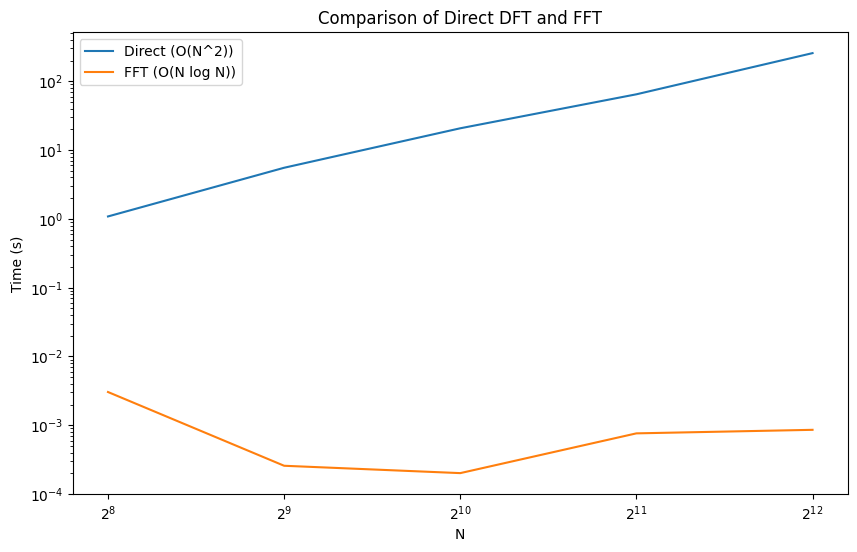

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from scipy.fft import fft

def direct_dft(signal):
    N = len(signal)
    result = np.zeros(N, dtype=complex)
    for j in range(N):
        for k in range(N):
            result[j] += signal[k] * np.exp(-2j * np.pi * j * k / N)
    return result

# Generate data for different values of N
N_values = [2**i for i in range(8, 13)]  # Adjust the range as needed
direct_times = []
fft_times = []

for N in N_values:
    signal = np.random.rand(N) + 1j * np.random.rand(N)

    # Measure time for direct DFT
    direct_time = timeit.timeit(lambda: direct_dft(signal), number=10)
    direct_times.append(direct_time)

    # Measure time for FFT
    fft_time = timeit.timeit(lambda: fft(signal), number=10)
    fft_times.append(fft_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(N_values, direct_times, label='Direct (O(N^2))')
plt.plot(N_values, fft_times, label='FFT (O(N log N))')
plt.xscale('log', base=2)
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.title('Comparison of Direct DFT and FFT')
plt.legend()
plt.show()


In [ ]:
import cv2
import numpy as np
import time

def direct_dft(signal):
    N = len(signal)
    result = np.zeros(N, dtype=complex)
    for j in range(N):
        for k in range(N):
            result[j] += signal[k] * np.exp(-2j * np.pi * j * k / N)
    return result

# Cargar la imagen
imagen = cv2.imread('zebra.jpg', cv2.IMREAD_GRAYSCALE)

# Redimensionar la imagen a 2048x2048
imagen = cv2.resize(imagen, (2048, 2048))

# Convertir la imagen a una señal unidimensional
signal = imagen.flatten()

# Calcular la DFT de la señal usando el método directo
start_time_direct = time.time()
dft_result = direct_dft(signal)
end_time_direct = time.time()
tiempo_direct = end_time_direct - start_time_direct

# Calcular la FFT de la señal usando NumPy
start_time_fft = time.time()
fft_result = np.fft.fft2(imagen)
end_time_fft = time.time()
tiempo_fft = end_time_fft - start_time_fft

# Comparar tiempos
print("Tiempo usando método directo: ", tiempo_direct)
print("Tiempo usando FFT: ", tiempo_fft)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy matplotlib

In [ ]:
# We import the modules to use
import os,sys
import cv2, numpy as np, math
from matplotlib import pyplot as plt
# change directory
%cd '/content/drive/My Drive'
#  the current directory
%pwd

# This allows to display images  and to save  them in cells
%matplotlib inline
# this definition allows to read files in a specific path
get_image = lambda route: os.path.join('/content/drive/My Drive/images2', route)

/content/drive/My Drive


In [ ]:
import cv2
import numpy as np
import time

def direct_2d_dft(image):
    # Obtener dimensiones de la imagen
    rows, cols = image.shape

    # Calcular DFT 1D para cada fila
    dft_rows = np.zeros((rows, cols), dtype=complex)
    for i in range(rows):
        dft_rows[i, :] = np.fft.fft(image[i, :])

    # Calcular DFT 1D para cada columna de las DFT 1D de las filas
    dft_2d = np.zeros((rows, cols), dtype=complex)
    for j in range(cols):
        dft_2d[:, j] = np.fft.fft(dft_rows[:, j])

    return dft_2d

# Cargar la imagen
im = cv2.imread(get_image('zebra.jpg'), cv2.IMREAD_GRAYSCALE)
# Redimensionar la imagen a 2048x2048
imagen = cv2.resize(im, (2048, 2048))

# Calcular la DFT 2D de la señal usando el método directo 2D
start_time_direct_2d = time.time()
dft_2d_result = direct_2d_dft(imagen)
end_time_direct_2d = time.time()
tiempo_direct_2d = end_time_direct_2d - start_time_direct_2d

# Calcular la FFT 2D de la señal usando NumPy
start_time_fft = time.time()
fft_result = np.fft.fft2(imagen)
end_time_fft = time.time()
tiempo_fft = end_time_fft - start_time_fft

# Comparar tiempos
print("Tiempo usando método directo 2D: ", tiempo_direct_2d)
print("Tiempo usando FFT: ", tiempo_fft)


Tiempo usando método directo 2D:  0.46774768829345703
Tiempo usando FFT:  0.14742803573608398


In [ ]:
# We start by getting access to the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

def direct_2d_dft(image):
    # Obtener dimensiones de la imagen
    rows, cols = image.shape

    # Calcular DFT 1D para cada fila
    dft_rows = np.zeros((rows, cols), dtype=complex)
    for i in range(rows):
        dft_rows[i, :] = np.fft.fft(image[i, :])

    # Calcular DFT 1D para cada columna de las DFT 1D de las filas
    dft_2d = np.zeros((rows, cols), dtype=complex)
    for j in range(cols):
        dft_2d[:, j] = np.fft.fft(dft_rows[:, j])

    return dft_2d

# Tamaños de imágenes a simular
tamanos = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]

# Listas para almacenar los tiempos de ejecución
tiempos_direct_2d = []
tiempos_fft = []

for tamano in tamanos:
    # Generar imagen aleatoria del tamaño específico
    imagen = np.random.rand(tamano, tamano)

    # Calcular la DFT 2D de la señal usando el método directo 2D
    start_time_direct_2d = time.time()
    dft_2d_result = direct_2d_dft(imagen)
    end_time_direct_2d = time.time()
    tiempo_direct_2d = end_time_direct_2d - start_time_direct_2d
    tiempos_direct_2d.append(tiempo_direct_2d)

    # Calcular la FFT 2D de la señal usando NumPy
    start_time_fft = time.time()
    fft_result = np.fft.fft2(imagen)
    end_time_fft = time.time()
    tiempo_fft = end_time_fft - start_time_fft
    tiempos_fft.append(tiempo_fft)

# Graficar los tiempos de ejecución
plt.plot(tamanos, tiempos_direct_2d, label="Directo 2D")
plt.plot(tamanos, tiempos_fft, label="FFT")
plt.xlabel("Tamaño de la imagen")
plt.ylabel("Tiempo de ejecución (s)")
plt.title("Comparación de tiempos de ejecución")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.yscale("log")
plt.show()


In [ ]:
!pip install matplotlib sympy


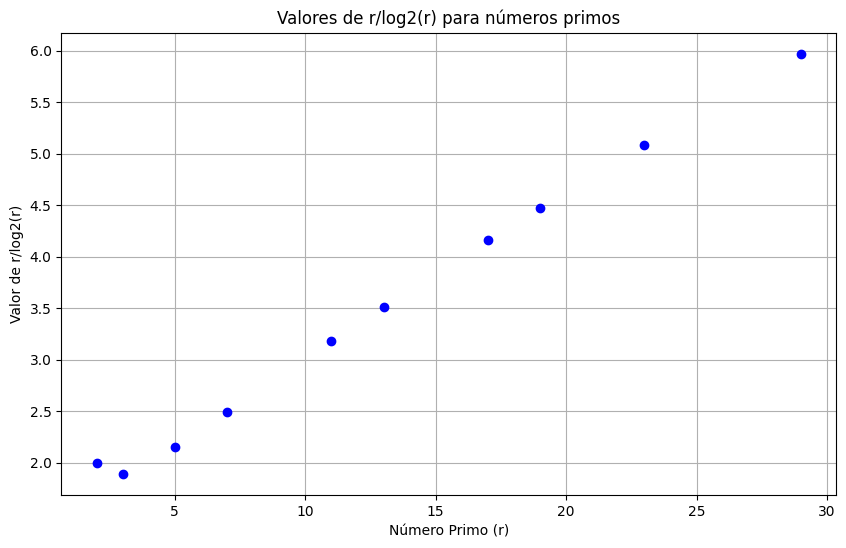

In [ ]:
import matplotlib.pyplot as plt
import sympy as sp

# Función para calcular el valor de r/log2(r) para un número primo r
def calculate_values(prime_list):
    values = []
    for prime in prime_list:
        values.append(prime / sp.log(prime, 2))
    return values

# Generar una lista de los primeros 'n' números primos
n_primes = 10
prime_list = list(sp.primerange(2, 500))  # Convertir el generador en una lista

# Calcular los valores de r/log2(r) para los números primos dados
values = calculate_values(prime_list)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(prime_list[:n_primes], values[:n_primes], marker='o', linestyle='None', color='blue')
plt.title('Valores de r/log2(r) para números primos')
plt.xlabel('Número Primo (r)')
plt.ylabel('Valor de r/log2(r)')
plt.grid(True)
plt.show()

